## Case Study on Analysis of Customer Churn for a Telecom Company

### *Analyst: Anuj Popli*
### *Contact info: anuj_popli999@yahoo.com*

### About Dataset
#### Context:
#### "Predict behavior to retain customers. Analyze all relevant customer data and develop focused customer retention programs."


#### Content:
#### Each row represents a customer, and each column contains customer’s attributes.

#### The data set includes information about:
>1. Customers who left – the column is called Churn
>2. Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
>3. Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
>4. Demographic info about customers – gender, age, and if they have partners and dependents


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.shape

(7043, 21)

### Problem Statement 1: How many customers are present in the dataset?

In [6]:
df['customerID'].nunique()

7043

### Problem Statement 2: What is the distribution of gender among the customers?

In [7]:
df['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [8]:
print("Following is the gender distribution among customers:")
gen_dis = df.groupby('gender')['gender'].count()
gen_dis

Following is the gender distribution among customers:


gender
Female    3488
Male      3555
Name: gender, dtype: int64

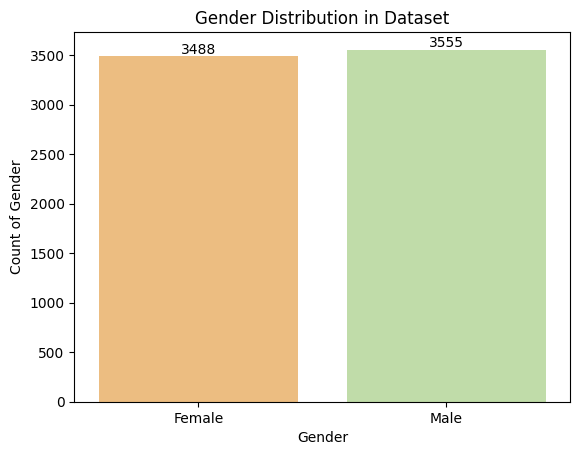

In [9]:
ax=sns.barplot(x=gen_dis.index,y=gen_dis,palette='Spectral')
plt.title('Gender Distribution in Dataset')
plt.xlabel('Gender')
plt.ylabel('Count of Gender')
ax.bar_label(ax.containers[0])
plt.show()

### Problem Statement 3: How does age vary among the customers?

In [10]:
df['SeniorCitizen'].unique()

array([0, 1], dtype=int64)

In [11]:
df['SeniorCitizen'] = df['SeniorCitizen'].astype(str)

#### In this dataset, a column for senior citizen is given, where 1 denotes customer is a senior citizen and 0 denotes customer is not a senior citizen. So, in order to make it a little more intuitive, 1 is replaced with 'Senior Citizen' and 0 with 'Younger Citizen'.

In [12]:
df['SeniorCitizen'] = df['SeniorCitizen'].map(lambda x:x.replace('0','Younger Citizen'))

In [13]:
df['SeniorCitizen'] = df['SeniorCitizen'].map(lambda x:x.replace('1','Senior Citizen'))

In [14]:
age = df.groupby('SeniorCitizen')['SeniorCitizen'].count()
age

SeniorCitizen
Senior Citizen     1142
Younger Citizen    5901
Name: SeniorCitizen, dtype: int64

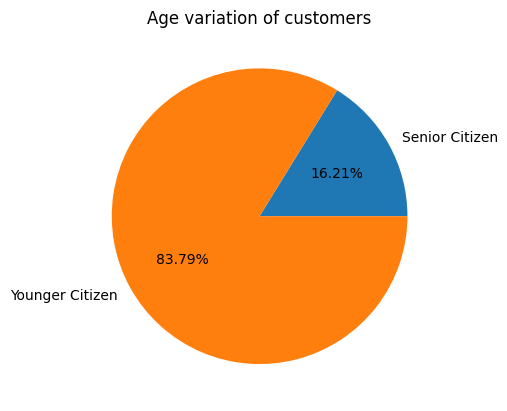

In [15]:
plt.pie(age,labels=age.index,autopct='%.2f%%')
plt.title("Age variation of customers")
plt.show()

### Problem Statement 4: What are the different locations from which customers belong?

#### The location data is not given directly in the dataset. However, we can assume location, based on availability of fiber optic.
#### Assume, that the company's philosophy is to mandatorily switch to fiber optic from DSL as its approach towards providing better services to clients without any increase in cost.
#### Assume, that the clients who have fiber optic are categorized as living in 'Developed' location and the ones with DSL are living in 'Developing' and the ones with no internet can be classified as 'Not Specified'.
#### The above mentioned points are just assumptions.

In [16]:
df['InternetService'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [17]:
df['location'] = df.InternetService.apply(lambda x: 'Developed' if x == 'Fiber optic'  else ('Developing' if x == 'DSL' else 'Not Specified'))

In [18]:
loc = df.groupby('location')['location'].count()
loc

location
Developed        3096
Developing       2421
Not Specified    1526
Name: location, dtype: int64

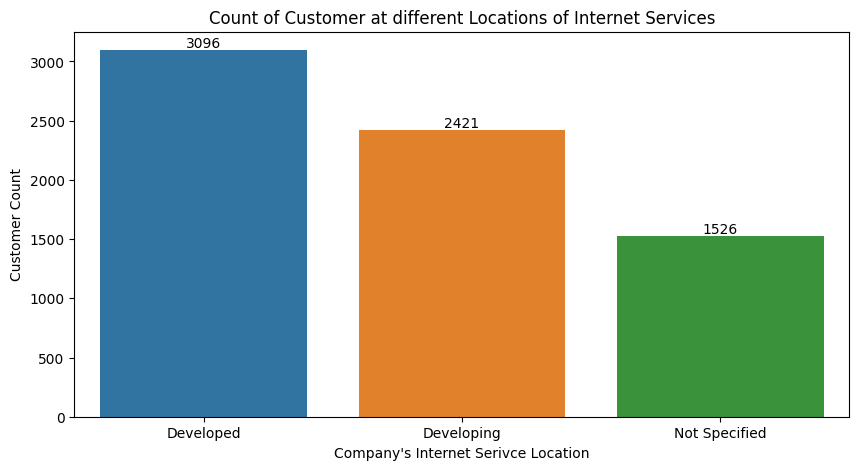

In [19]:
plt.figure(figsize=(10,5))
ax=sns.barplot(x=loc.index,y=loc)
plt.xlabel("Company's Internet Serivce Location")
plt.ylabel("Customer Count")
plt.title("Count of Customer at different Locations of Internet Services")
ax.bar_label(ax.containers[0])
plt.show()

### Problem Statement 5: How long have customers been using the service on average?

#### As the customers mentioned in the data table were using atleast one of the services of the telecom company. Also, the churn column denotes the customers who left, but were client of company at least one month ago. Therefore, we will take all the customers into account before churn happened and get the average.
#### Also, assuming tenure is the time for which customer is associated with the telecom company and its unit is months.

In [20]:
print("The average duration of customers using the telecom company's services are",round(df['tenure'].mean(),1),"months")

The average duration of customers using the telecom company's services are 32.4 months


### Problem Statement 6: What is the distribution of subscription types?

In [21]:
df['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

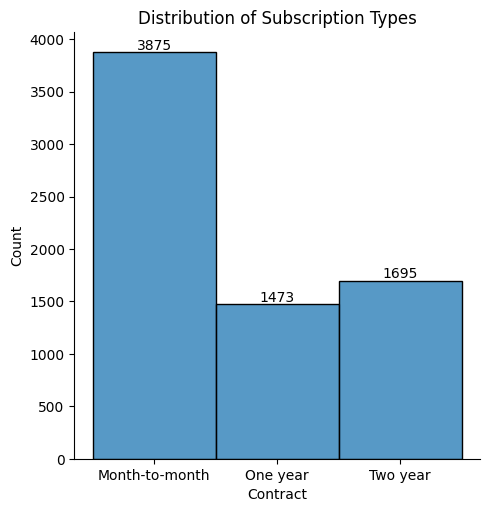

In [22]:
a = sns.displot(df['Contract'])
plt.title("Distribution of Subscription Types")
for ax in a.axes.flat:
    ax.bar_label(ax.containers[0])
plt.show()

##### It can be seen from above visualization that month-to-month subscribers are more as no long-term commitment is involved here.

### Problem Statement 7: What is the average monthly charge incurred by customers?

In [23]:
#Assuming monthly charges are in USD. Calculating the mean of column 'MonthlyCharges' and rounding it to 1 decimal place.

print("The average monthly charges incurred by customers are USD",round(df['MonthlyCharges'].mean(),1))

The average monthly charges incurred by customers are USD 64.8


### Problem Statement 8: What is the range of total charges accumulated by customers?

In [24]:
# Converting the column to numeric while changing the datatype to float to account for actual minimum and maximum of column.

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors='coerce',downcast='float')

In [25]:
# Range is determined using the min() and max() of column 'TotalCharges'

print("The range of total charges accumulated by customers varies from USD",round(df['TotalCharges'].min(),1),"to USD",round(df['TotalCharges'].max(),1))

The range of total charges accumulated by customers varies from USD 18.8 to USD 8684.8


### Problem Statement 9: How many customers have churned?

In [26]:
df['Churn'].unique()

array(['No', 'Yes'], dtype=object)

In [27]:
# Getting the count of 'Yes' in column 'Churn'

print("The total number of customers which are churned are",df.groupby('Churn')['Churn'].count().Yes)

The total number of customers which are churned are 1869


#### Problem Statement 10: What is the churn rate in the dataset?

In [28]:
# Churn rate is defined as the percentage of sum of total customers left over the sum of total customers.
# Here, count() is used because we are dealing with categorical datatype. Therefore, total count of 'Yes' is representative of
# sum of customers who left. Also, the same applies to when it comes to getting the total customers, which is simply the count
# of all rows, as there are only 'Yes' and 'No'.

print("The churn rate of customers in the dataset is",round(((df.groupby('Churn')['Churn'].count().Yes)/(df['Churn'].count()))*100,1),"%")

The churn rate of customers in the dataset is 26.5 %


#### Problem Statement 11: How does churn vary across different genders?

In [29]:
d = df['Churn']=='Yes'
d

0       False
1       False
2        True
3       False
4        True
        ...  
7038    False
7039    False
7040    False
7041     True
7042    False
Name: Churn, Length: 7043, dtype: bool

##### Creating a dataframe named dfc on the basis of churned customers only

In [30]:
dfc = df[d]

In [31]:
dfc

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,location
2,3668-QPYBK,Male,Younger Citizen,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.150002,Yes,Developing
4,9237-HQITU,Female,Younger Citizen,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.649994,Yes,Developed
5,9305-CDSKC,Female,Younger Citizen,No,No,8,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.500000,Yes,Developed
8,7892-POOKP,Female,Younger Citizen,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.050049,Yes,Developed
13,0280-XJGEX,Male,Younger Citizen,No,No,49,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.299805,Yes,Developed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7021,1699-HPSBG,Male,Younger Citizen,No,No,12,Yes,No,DSL,No,...,Yes,Yes,No,One year,Yes,Electronic check,59.80,727.799988,Yes,Developing
7026,8775-CEBBJ,Female,Younger Citizen,No,No,9,Yes,No,DSL,No,...,No,No,No,Month-to-month,Yes,Bank transfer (automatic),44.20,403.350006,Yes,Developing
7032,6894-LFHLY,Male,Senior Citizen,No,No,1,Yes,Yes,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,75.75,75.750000,Yes,Developed
7034,0639-TSIQW,Female,Younger Citizen,No,No,67,Yes,Yes,Fiber optic,Yes,...,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.250000,Yes,Developed


In [32]:
a=dfc.groupby('gender')['Churn'].count()
a

gender
Female    939
Male      930
Name: Churn, dtype: int64

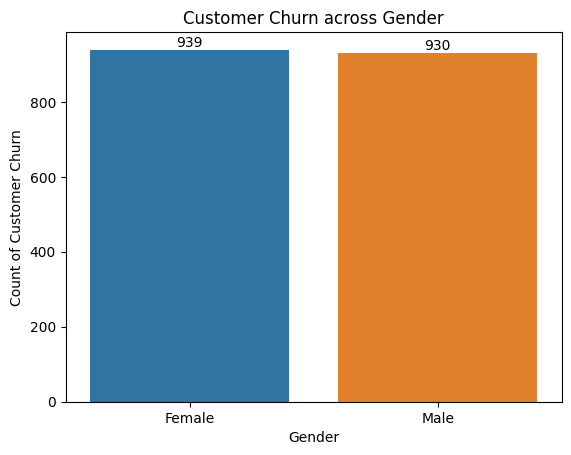

In [33]:
ax=sns.barplot(x=a.index,y=a)
plt.title('Customer Churn across Gender')
plt.xlabel('Gender')
plt.ylabel('Count of Customer Churn')
ax.bar_label(ax.containers[0])
plt.show()

# Churn of customers is almost equal in both females and males. It is not impacted by gender of customers.

#### Problem Statement 12: Are there any differences in churn based on the customer's age?

In [34]:
age_churn = dfc.groupby('SeniorCitizen')['Churn'].count()
age_churn

SeniorCitizen
Senior Citizen      476
Younger Citizen    1393
Name: Churn, dtype: int64

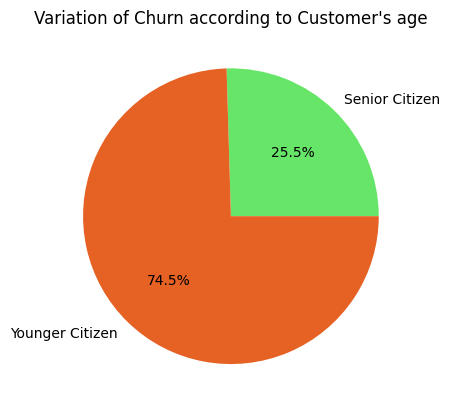

In [35]:
import matplotlib.colors as mcolors
plt.pie(age_churn,labels=age_churn.index,autopct="%.1f%%",colors=["#67E568","#E56124"])
plt.title("Variation of Churn according to Customer's age")
sns.set_palette('husl')
plt.show()

# Customer churn is definitely dependent on age of citizens. Following can be interpreted:
# 1. Younger citizens are more active and attend to offers regarding new or discounted plans from various other telecom companies
# and therefore switch to other companies if they get better offers.
# 2. Senior citizens like more stability and like to stick with what they have.
# 3. Company should create some sort of retention plan for younger citizens and get feedback from them as to check if they are
# leaving because of better prices, faster internet speeds, or better combos.

##### Customer churn is definitely dependent on age of citizens. Following can be interpreted from above visualization:
##### 1. Younger citizens are more active and attend to offers regarding new or discounted plans from various other telecom companies and therefore switch to other companies if they get better offers.
##### 2. Senior citizens like more stability and like to stick with what they have.
##### 3. Company should create some sort of retention plan for younger citizens and get feedback from them as to check if they are leaving because of better prices, faster internet speeds, or better combos.

#### Problem Statement 13: Are customers from specific locations more likely to churn?

In [36]:
loc_churn = dfc.groupby('location')['Churn'].count()
loc_churn

location
Developed        1297
Developing        459
Not Specified     113
Name: Churn, dtype: int64

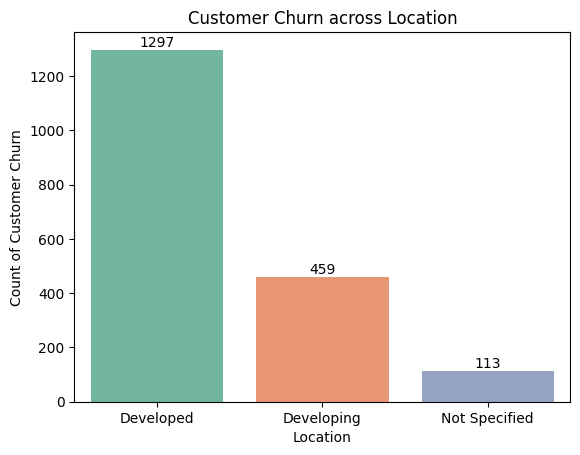

In [37]:
ax=sns.barplot(x=loc_churn.index,y=loc_churn,palette='Set2')
plt.title('Customer Churn across Location')
plt.xlabel('Location')
plt.ylabel('Count of Customer Churn')
ax.bar_label(ax.containers[0])
plt.show()

##### Customer churn is also dependent on location of customers.
##### It can be interpreted from above visualization, that in developed locations, there is possibility of having more competitors with better deals and services, which led to customer churn as compared to developing locations.

#### Problem Statement 14: Does the subscription type influence customer churn?

In [38]:
sub_churn = dfc.groupby('Contract')['Churn'].count()
sub_churn

Contract
Month-to-month    1655
One year           166
Two year            48
Name: Churn, dtype: int64

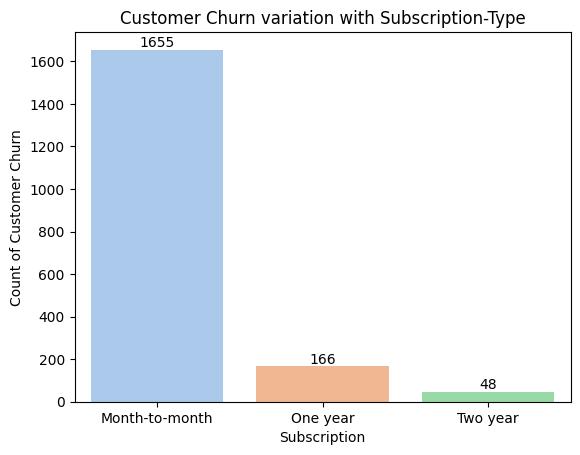

In [39]:
ax=sns.barplot(x=sub_churn.index,y=sub_churn,palette='pastel')
plt.title('Customer Churn variation with Subscription-Type')
plt.xlabel('Subscription')
plt.ylabel('Count of Customer Churn')
ax.bar_label(ax.containers[0])
plt.show()

##### From the above visualization, we see that customers on month-to-month plans churn more. The customers on month-to-month plans have no long-term commitment with the service provider. Therefore, as soon as they get better plans or services, they tend to switch to other service providers.

#### Problem Statement 15: Is there any correlation between monthly charges and total charges?

In [40]:
corr = df['MonthlyCharges'].corr(df['TotalCharges'])
print("The correlation between Monthly Charges and Total Charges is",corr)

The correlation between Monthly Charges and Total Charges is 0.6510648031856261


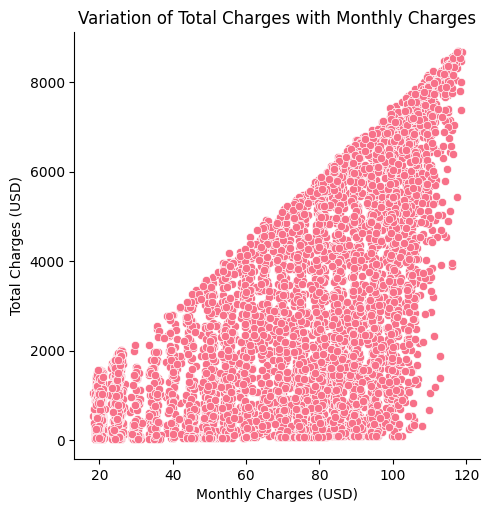

In [41]:
sns.relplot(x=df['MonthlyCharges'],y=df['TotalCharges'])
plt.title("Variation of Total Charges with Monthly Charges")
#Assuming charges in USD
plt.xlabel("Monthly Charges (USD)")
plt.ylabel("Total Charges (USD)")
plt.show()

##### There is no clear correlation. But, it can be seen from the above visualization that as the monthly charges increase the total charges are also increased.